# Plotting R1 and R2 as a function of tau_c for 1H-15N 

In [2]:
## Import useful things 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Colours (match other figures for R1 and R2 in theory section)
r1_colour = 0.82,0.26,0.20 #D24332 = 210, 67, 50 
r2_colour = 0.53,0.78,0.87 #86C5DD = 134, 197, 221 

# Set the font to Arial
plt.rcParams['font.family'] = 'Arial'
plt.rc('font', size=8)

# Equations 
R1 and R2 and other constant stuff taken from https://pubs.acs.org/doi/10.1021/ja980832l

In [3]:
# Constants (SI units)
gamma_N = -27.1e6  # rad T^-1 s^-1  
gamma_H = 267.5e6  # rad T^-1 s^-1 
h = 6.626075e-34  # joule-hertz^-1 
r_is = 1.02e-10   # Distance between proton and nitrogen in m 
delta_csa = -172.0e-6

In [4]:
# Function to calculate R1 and R2 at different field strengths 
def calculate_R1_and_R2_at_different_fields(field):
    # Calculate derived constants based on the field (SI)
    B0 = field * 1e6 * 2.0 * np.pi / gamma_H  # magentic field strength 
    wN = gamma_N * B0 #rad s^-1 
    wH = gamma_H * B0 #rad s^-1 
    d = (1e-7) * h * gamma_N * gamma_H * (r_is ** -3.0) / (np.pi * 2.0)
    c = B0 * gamma_N * delta_csa / np.sqrt(3.0)

    # Spectral density function
    def J_function(tc, w):
        return (2/5)*(tc/(1+w**2*tc**2))

    # R1 function
    def R1_function(d, JwN, JwH_m_N, JwN_p_H, c):
        return (d**2 / 4) * (3 * JwN + JwH_m_N + 6 * JwN_p_H) + c**2 * JwN 

    # R2 function
    def R2_function(d, J0, JwN, JwH, JwH_m_N, JwN_p_H, c):
        return (d**2 / 8) * (4 * J0 + 3 * JwN + JwH_m_N + 6 * JwH + 6 * JwN_p_H) + (c**2 / 6) * (4 * J0 + 3 * JwN) 

    # Calculate R1 and R2 values
    R1_values = np.empty_like(np.linspace(0.00000000001, 0.0000008, 50000))
    R2_values = np.empty_like(np.linspace(0.00000000001, 0.0000008, 50000))
    for a, b in enumerate(np.linspace(0.00000000001, 0.0000008, 50000)):
        # Calculate the spectral density at all the different values 
        R1_values[a] = R1_function(d, J_function(b, wN), J_function(b, (wH - wN)), J_function(b, (wN + wH)), c)
        R2_values[a] = R2_function(d, J_function(b, 0), J_function(b, wN), J_function(b, wH), J_function(b, wH - wN), J_function(b, wN + wH), c)

    return R1_values, R2_values

In [5]:
# Select field values (can change)
field_values = [600, 950]

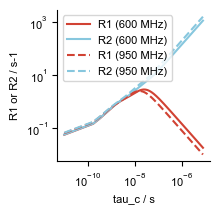

In [6]:
# Plot R1 and R2 values for each field value
fig = plt.figure()
ax = fig.add_subplot(111)
for i, field in enumerate(field_values):
    linestyle = '-' if i == 0 else '--'
    R1_values, R2_values = calculate_R1_and_R2_at_different_fields(field)
    ax.plot(np.linspace(0.00000000001, 0.000008, 50000), R1_values, label=f'R1 ({field} MHz)', color=r1_colour, linestyle=linestyle)
    ax.plot(np.linspace(0.00000000001, 0.000008, 50000), R2_values, label=f'R2 ({field} MHz)', color=r2_colour, linestyle=linestyle)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('tau_c / s')
ax.set_ylabel('R1 or R2 / s-1')
ax.axes.get_yaxis().set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.legend()
fig.set_size_inches(50/ 25.4, 50/ 25.4)
#plt.savefig('tau_c_r1_r2.pdf', format='pdf', dpi=2000, transparent=True,bbox_inches='tight')

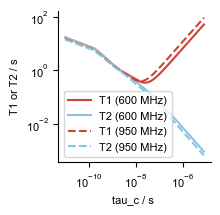

In [7]:
# Plot T1 and T2 values for each field value
fig = plt.figure()
ax = fig.add_subplot(111)
for i, field in enumerate(field_values):
    linestyle = '-' if i == 0 else '--'
    R1_values, R2_values = calculate_R1_and_R2_at_different_fields(field)
    ax.plot(np.linspace(0.00000000001, 0.000008, 50000), 1/R1_values, label=f'T1 ({field} MHz)', color=r1_colour, linestyle=linestyle)
    ax.plot(np.linspace(0.00000000001, 0.000008, 50000), 1/R2_values, label=f'T2 ({field} MHz)', color=r2_colour, linestyle=linestyle)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('tau_c / s ')
ax.set_ylabel('T1 or T2 / s')
ax.axes.get_yaxis().set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.legend()
fig.set_size_inches(50/ 25.4, 50/ 25.4)
plt.show()